# Machine Learning

For ease, the random forest classification ML will be used because of its:
- flexibility
- insensitive towards outliers
- ignores bad data cleaning and preprocessing

## 1 - Import Libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display
import tabulate
import math
import scipy.stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss, roc_auc_score, roc_curve, auc
import catboost
from catboost import CatBoostClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## 2 - Load Data

In [35]:
# Random Tree Classifier
train_df = pd.read_csv('prep_train_data.csv')
test_df = pd.read_csv('prep_test_data.csv')

train_df.head(2)

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,DiagPeriodL90D,pollutants,age_group,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163
0,0.417467,0.921613,0.90411,0.190511,0.435437,0.056145,0.068802,0.866679,0.396745,0.434950,0.420716,0.423201,0.285237,0.038128,0.001901,0.005034,0.559529,0.440471,0.254042,0.455714,0.696270,0.103752,0.849744,0.637757,0.176240,0.126807,0.316094,0.387695,0.361854,0.390296,0.477556,0.518436,0.678530,0.399146,0.269363,0.128667,0.088755,0.385628,0.328903,0.113812,0.284721,0.325515,0.967037,0.481575,0.435892,0.160467,0.023379,0.338689,0.622365,0.537459,0.479735,0.00000,0.352651,0.187345,0.102307,0.019311,0.154964,0.816955,0.432526,0.732197,0.235419,0.547324,0.377500,0.403810,0.348641,0.095833,1.0,0.723796,0.857143,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.277056,0.926092,0.60274,0.204085,0.544064,0.108404,0.362911,0.534683,0.302667,0.309035,0.390576,0.582980,0.462334,0.190147,0.131755,0.088500,0.561561,0.438439,0.590330,0.314703,0.451803,0.115291,0.661172,0.821970,0.545005,0.083586,0.102064,0.123138,0.101212,0.098799,0.160206,0.280345,0.405151,0.385533,0.572261,0.553194,0.325587,0.612127,0.447620,0.344249,0.617727,0.281797,0.379948,0.288691,0.526327,0.579439,0.204064,0.519721,0.703916,0.300757,0.556887,0.00102,0.470942,0.035436,0.417799,0.007641,0.135593,0.350834,0.501360,0.415745,0.101133,0.191203,0.301161,0.486185,0.182208,0.120960,1.0,0.616103,0.571429,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [36]:
# catboost
train_cat_df = pd.read_csv('cleaned_train_df.csv')
test_cat_df = pd.read_csv('cleaned_test_df.csv')

train_cat_df.head(2)

,patient_id,patient_race,payer_type,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,DiagPeriodL90D,pollutants,age_group
0,475714,White,MEDICAID,924,84,27.526253,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.10000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,24563.57143,44.585714,8674.50000,264634.2857,1165.000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.50000,1,8407.933786,90
1,349367,White,COMMERCIAL,928,62,28.490000,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.50303,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,41287.27273,61.463636,11725.66667,677688.5152,2003.125,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.10303,1,7220.973636,70


## 3 - Problem Formulation

### Note:
Unneeded columns such as:
- duplicates
- categorical features that were turned into one-hot
- features that identify specific row (ex. 'patient_id')
have been removed during the data cleaning.

In [38]:
# split df into features vs. target variable
# RFC
X_train = train_df.drop('DiagPeriodL90D', axis = 1)
Y_train = train_df['DiagPeriodL90D']

# catboost
X_train_cat = train_cat_df.drop('DiagPeriodL90D', axis = 1)
Y_train_cat = train_cat_df['DiagPeriodL90D']

# split df into train and validation sets
#RFC
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# catboost
X_train_cat, X_val_cat, Y_train_cat, Y_val_cat = train_test_split(X_train_cat, Y_train_cat, test_size=0.2, random_state=42)

## 4 - Train ML Algorithm

In [39]:
# train using Random Forest Classifier 
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# predict RFC validation set
Y_pred = clf.predict(X_val)

# ----------------------------------------------------------------------

# train using catboost
cat_features = X_train_cat.select_dtypes(include=['object']).columns.tolist()
cb = CatBoostClassifier(cat_features = cat_features)

# predict CB validation set
cb.fit(X_train_cat, Y_train_cat)
class_predictions = cb.predict(X_val_cat)
# probability predictions
prob_predictions = cb.predict_proba(X_val_cat)

Learning rate set to 0.027838
0:	learn: 0.6794861	total: 148ms	remaining: 2m 27s
1:	learn: 0.6667716	total: 285ms	remaining: 2m 22s
2:	learn: 0.6545663	total: 309ms	remaining: 1m 42s
3:	learn: 0.6434520	total: 388ms	remaining: 1m 36s
4:	learn: 0.6328813	total: 413ms	remaining: 1m 22s
5:	learn: 0.6231504	total: 430ms	remaining: 1m 11s
6:	learn: 0.6139026	total: 492ms	remaining: 1m 9s
7:	learn: 0.6052264	total: 512ms	remaining: 1m 3s
8:	learn: 0.5971050	total: 533ms	remaining: 58.7s
9:	learn: 0.5894241	total: 550ms	remaining: 54.4s
10:	learn: 0.5825177	total: 565ms	remaining: 50.8s
11:	learn: 0.5758987	total: 575ms	remaining: 47.4s
12:	learn: 0.5699446	total: 592ms	remaining: 44.9s
13:	learn: 0.5640139	total: 607ms	remaining: 42.7s
14:	learn: 0.5587055	total: 623ms	remaining: 40.9s
15:	learn: 0.5535166	total: 636ms	remaining: 39.1s
16:	learn: 0.5488670	total: 649ms	remaining: 37.5s
17:	learn: 0.5441935	total: 662ms	remaining: 36.1s
18:	learn: 0.5399558	total: 676ms	remaining: 34.9s
19:	l

162:	learn: 0.4510784	total: 3.02s	remaining: 15.5s
163:	learn: 0.4508965	total: 3.04s	remaining: 15.5s
164:	learn: 0.4507295	total: 3.06s	remaining: 15.5s
165:	learn: 0.4505731	total: 3.08s	remaining: 15.5s
166:	learn: 0.4504814	total: 3.09s	remaining: 15.4s
167:	learn: 0.4504456	total: 3.1s	remaining: 15.3s
168:	learn: 0.4502899	total: 3.12s	remaining: 15.3s
169:	learn: 0.4501179	total: 3.13s	remaining: 15.3s
170:	learn: 0.4499688	total: 3.15s	remaining: 15.3s
171:	learn: 0.4497942	total: 3.16s	remaining: 15.2s
172:	learn: 0.4495881	total: 3.18s	remaining: 15.2s
173:	learn: 0.4494812	total: 3.2s	remaining: 15.2s
174:	learn: 0.4494170	total: 3.21s	remaining: 15.1s
175:	learn: 0.4492737	total: 3.23s	remaining: 15.1s
176:	learn: 0.4491612	total: 3.25s	remaining: 15.1s
177:	learn: 0.4489645	total: 3.26s	remaining: 15.1s
178:	learn: 0.4488399	total: 3.28s	remaining: 15s
179:	learn: 0.4486883	total: 3.29s	remaining: 15s
180:	learn: 0.4485345	total: 3.31s	remaining: 15s
181:	learn: 0.448325

322:	learn: 0.4321745	total: 5.72s	remaining: 12s
323:	learn: 0.4320578	total: 5.74s	remaining: 12s
324:	learn: 0.4319115	total: 5.76s	remaining: 12s
325:	learn: 0.4318617	total: 5.78s	remaining: 11.9s
326:	learn: 0.4317981	total: 5.79s	remaining: 11.9s
327:	learn: 0.4317093	total: 5.8s	remaining: 11.9s
328:	learn: 0.4315624	total: 5.82s	remaining: 11.9s
329:	learn: 0.4314976	total: 5.84s	remaining: 11.9s
330:	learn: 0.4312462	total: 5.85s	remaining: 11.8s
331:	learn: 0.4311595	total: 5.87s	remaining: 11.8s
332:	learn: 0.4310946	total: 5.88s	remaining: 11.8s
333:	learn: 0.4310532	total: 5.9s	remaining: 11.8s
334:	learn: 0.4308998	total: 5.92s	remaining: 11.7s
335:	learn: 0.4307841	total: 5.93s	remaining: 11.7s
336:	learn: 0.4306396	total: 5.95s	remaining: 11.7s
337:	learn: 0.4305886	total: 5.97s	remaining: 11.7s
338:	learn: 0.4304849	total: 5.98s	remaining: 11.7s
339:	learn: 0.4303435	total: 6s	remaining: 11.6s
340:	learn: 0.4301876	total: 6.01s	remaining: 11.6s
341:	learn: 0.4301322	t

487:	learn: 0.4114605	total: 8.4s	remaining: 8.81s
488:	learn: 0.4112857	total: 8.41s	remaining: 8.79s
489:	learn: 0.4111274	total: 8.44s	remaining: 8.78s
490:	learn: 0.4110065	total: 8.45s	remaining: 8.76s
491:	learn: 0.4108566	total: 8.46s	remaining: 8.74s
492:	learn: 0.4107697	total: 8.48s	remaining: 8.72s
493:	learn: 0.4106910	total: 8.5s	remaining: 8.71s
494:	learn: 0.4106051	total: 8.51s	remaining: 8.69s
495:	learn: 0.4104095	total: 8.53s	remaining: 8.67s
496:	learn: 0.4103287	total: 8.54s	remaining: 8.64s
497:	learn: 0.4101868	total: 8.56s	remaining: 8.63s
498:	learn: 0.4099749	total: 8.58s	remaining: 8.61s
499:	learn: 0.4098719	total: 8.59s	remaining: 8.59s
500:	learn: 0.4097629	total: 8.61s	remaining: 8.57s
501:	learn: 0.4096814	total: 8.63s	remaining: 8.56s
502:	learn: 0.4095689	total: 8.64s	remaining: 8.54s
503:	learn: 0.4095207	total: 8.66s	remaining: 8.52s
504:	learn: 0.4094574	total: 8.67s	remaining: 8.5s
505:	learn: 0.4092878	total: 8.69s	remaining: 8.48s
506:	learn: 0.4

655:	learn: 0.3922714	total: 11.1s	remaining: 5.83s
656:	learn: 0.3922031	total: 11.1s	remaining: 5.81s
657:	learn: 0.3921564	total: 11.1s	remaining: 5.79s
658:	learn: 0.3920562	total: 11.2s	remaining: 5.78s
659:	learn: 0.3919640	total: 11.2s	remaining: 5.76s
660:	learn: 0.3919117	total: 11.2s	remaining: 5.74s
661:	learn: 0.3918770	total: 11.2s	remaining: 5.72s
662:	learn: 0.3917316	total: 11.2s	remaining: 5.71s
663:	learn: 0.3917178	total: 11.2s	remaining: 5.69s
664:	learn: 0.3915642	total: 11.3s	remaining: 5.67s
665:	learn: 0.3914825	total: 11.3s	remaining: 5.65s
666:	learn: 0.3913960	total: 11.3s	remaining: 5.63s
667:	learn: 0.3913080	total: 11.3s	remaining: 5.62s
668:	learn: 0.3911862	total: 11.3s	remaining: 5.6s
669:	learn: 0.3910579	total: 11.3s	remaining: 5.58s
670:	learn: 0.3910180	total: 11.3s	remaining: 5.57s
671:	learn: 0.3909018	total: 11.4s	remaining: 5.55s
672:	learn: 0.3907676	total: 11.4s	remaining: 5.53s
673:	learn: 0.3907281	total: 11.4s	remaining: 5.51s
674:	learn: 0

824:	learn: 0.3768988	total: 13.8s	remaining: 2.93s
825:	learn: 0.3768241	total: 13.8s	remaining: 2.91s
826:	learn: 0.3767599	total: 13.8s	remaining: 2.9s
827:	learn: 0.3766417	total: 13.9s	remaining: 2.88s
828:	learn: 0.3764521	total: 13.9s	remaining: 2.86s
829:	learn: 0.3763218	total: 13.9s	remaining: 2.85s
830:	learn: 0.3762210	total: 13.9s	remaining: 2.83s
831:	learn: 0.3761760	total: 13.9s	remaining: 2.81s
832:	learn: 0.3761007	total: 13.9s	remaining: 2.79s
833:	learn: 0.3760462	total: 14s	remaining: 2.78s
834:	learn: 0.3759449	total: 14s	remaining: 2.76s
835:	learn: 0.3759337	total: 14s	remaining: 2.74s
836:	learn: 0.3758876	total: 14s	remaining: 2.73s
837:	learn: 0.3758261	total: 14s	remaining: 2.71s
838:	learn: 0.3757679	total: 14s	remaining: 2.69s
839:	learn: 0.3756916	total: 14s	remaining: 2.68s
840:	learn: 0.3756538	total: 14.1s	remaining: 2.66s
841:	learn: 0.3754897	total: 14.1s	remaining: 2.64s
842:	learn: 0.3753549	total: 14.1s	remaining: 2.63s
843:	learn: 0.3753370	total

993:	learn: 0.3610220	total: 16.5s	remaining: 99.8ms
994:	learn: 0.3608881	total: 16.5s	remaining: 83.2ms
995:	learn: 0.3608251	total: 16.6s	remaining: 66.5ms
996:	learn: 0.3607256	total: 16.6s	remaining: 49.9ms
997:	learn: 0.3606622	total: 16.6s	remaining: 33.3ms
998:	learn: 0.3605557	total: 16.6s	remaining: 16.6ms
999:	learn: 0.3604257	total: 16.6s	remaining: 0us


## 5 - Evaluate Performance

In [40]:
# Evaluating RFC
print('--- Score ---\n')
score = accuracy_score(Y_val, Y_pred)
print('score:', score)

print('\n--- Classification Report ---\n')
print(classification_report(Y_val, Y_pred))

--- Score ---

score: 0.7762183235867446

--- Classification Report ---

              precision    recall  f1-score   support

         0.0       0.77      0.55      0.65       946
         1.0       0.78      0.91      0.84      1619

    accuracy                           0.78      2565
   macro avg       0.78      0.73      0.74      2565
weighted avg       0.78      0.78      0.77      2565



In [41]:
print('--- CatBoost Eval ---')
# Evaluating CB (uncleaned)
log_loss_value = log_loss(Y_val_cat, prob_predictions[:,1])
print(f'Log Loss: {log_loss_value}')

roc_auc = roc_auc_score(Y_val_cat, prob_predictions[:,1])
print(f'ROC AUC: {roc_auc}')

score = accuracy_score(Y_val_cat, class_predictions)
print('score:', score)

class_report = classification_report(Y_val_cat, class_predictions)
print(f'\n--- Classification Report: ---\n {class_report}')

--- CatBoost Eval ---
Log Loss: 0.4760539440894948
ROC AUC: 0.7826934904875638
score: 0.8062378167641325

--- Classification Report: ---
               precision    recall  f1-score   support

           0       0.89      0.54      0.67       946
           1       0.78      0.96      0.86      1619

    accuracy                           0.81      2565
   macro avg       0.84      0.75      0.77      2565
weighted avg       0.82      0.81      0.79      2565



In [42]:
def compare_classifiers(classifiers, y_true, y_pred):
    for clf_name, clf in classifiers.items():
        y_true = y_true_dict.get(clf_name)
        y_pred = y_preds_dict.get(clf_name)
        
        if isinstance(clf, RandomForestClassifier):
            fpr, tpr, threshold = roc_curve(y_true, y_pred)
        else:
            fpr, tpr, threshold = roc_curve(y_true, y_pred[:,1]) # extracts probabilities for class 1
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label = f'{clf_name} AUC = %0.2f' % roc_auc)
        
    # plot
    plt.title('Reciever Operatering Characteristic')
    plt.legend(loc = 'lower right')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot([0,1], [0,1], color = 'navy', label = 'Reference', linestyle = '--') # plots reference/random guess line
    plt.show()

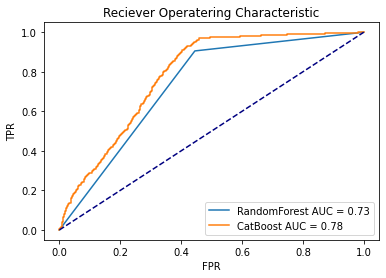

In [43]:
classifiers = {'RandomForest': RandomForestClassifier(),
              'CatBoost': CatBoostClassifier()}

y_true_dict = {'RandomForest': Y_val,
               'CatBoost': Y_val_cat}

y_preds_dict = {'RandomForest': Y_pred,
                'CatBoost': prob_predictions}

compare_classifiers(classifiers, y_true, y_preds)

### Note:
Will not dive into feature importances, hyper-tuning the parameters, or cross validation. Will evaluate now. Best model seems to be the CatBoost. 
- log loss: measures how well a a model can guess the true probability. Lower log loss means better predictions. Model log loss = 0.48
- ROC AUC: performance measurement that predicts positive outcomes. Higher AUC means a better model. CB shows a better line on the ROC graph; and has a higher AUC score (AUC = 0.78).
- Classification Report: CB model shows a little higher stats in all categories.

Without fine tuning the model, CB exhibited farily decent predictive capability.

## 6 - Apply ML to Challenge Set

In [46]:
predictions = cb.predict(test_cat_df)
submission = pd.DataFrame({
    'patient_id': test_cat_df['patient_id'],
    'DiaPeriodL90D': predictions
})
submission.to_csv('submission.csv', index = False)

In [47]:
submission.head()

,patient_id,DiaPeriodL90D
0,573710,1
1,593679,1
2,184532,1
3,447383,1
4,687972,1
